# Assignment 1
## This notebook implements analysis of data for the model analysis for assignment one.
These two datasets look at Diabetes health predictors and Airline Passenger Satisfaction.
The files that we used are prepared by the Assignment1-DataAnalysis.ipynb notebook. 
We first look at all five algoritms on the Airline Passsenger data, with the intent to find out
how to improve the satisfaction of Business Travelers in Economy and Economy Plus, who are loyal
to the airline but don't feel satisfied. Is there a way that we can help them feel better about their
experience and hopefully continue to fly with this airline?
We want to be as accurate as possible about scoring the data to find the arlgoritm that produces the
most accurate measure of satisfaction. We would want to trade this off against precision (accurately determining
those that are satisfied) vs Recall, finding all those that are satisfied at the potential false positives.
So here we would want to focus on a balance of both so we choose an F1-score.

The second dataset is derived from a CDC data questionaire from 2015 which uses phone calls to 
determine the characteristics of those who may suffer from diabetes. The essentialy question is
can we determine by the answers to all the other questions, whether someone is likely to have diabetes?
If so can we recommend those that don't know they have it to go in for a test. One would think that we
would want to maximize RECALL because we do want to find all possible folks who could have diabetes.


### Airline Passenger 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
# @ignore_warnings(category=ConvergenceWarning)
# def my_function():
#     # Code that triggers the warning
# "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/download?datasetVersionNumber=1"

In [3]:
# set location for the different dataset files
airline_dataset_file_train = '../../Data/AirlinePassengerSatisfaction/train.csv'
airline_dataset_file_test = '../../Data/AirlinePassengerSatisfaction/test.csv'
diabetes_dataset_file = '../../Data/DiabetesHealthIndicatorDataset/diabetes_binary_health_indicators_BRFSS2015.csv'

In [4]:
airline_data = pd.read_csv(airline_dataset_file_train,index_col=0)

In [5]:
airline_data_test = pd.read_csv(airline_dataset_file_test,index_col=0)

In [6]:
display(airline_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

None

In [7]:
display(airline_data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

None

In [8]:
airline_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
airline_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Check for imbalanced data

In [10]:
## If forecasting diabetes, is the data imbalanced
airline_data['satisfaction'].value_counts()/airline_data.value_counts().sum()*100

neutral or dissatisfied    56.836303
satisfied                  43.462942
Name: satisfaction, dtype: float64

In [11]:
## If forecasting diabetes, is the data imbalanced
airline_data['satisfaction'].value_counts()/airline_data.value_counts().sum()*100

neutral or dissatisfied    56.836303
satisfied                  43.462942
Name: satisfaction, dtype: float64

### About equal. 43% - we can avoid balancing the data if we were only looking at the overall dataset, but in fact when we look at only economy and economy plust for business travelers.

In [12]:
## Categorical vs numeric

In [13]:
# split the dataframe into its numerical and categorical components
X_num = airline_data.select_dtypes(exclude='object')
X_cat = airline_data.select_dtypes(include='object')

In [14]:
X_num.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
X_cat.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [16]:
airline_data = airline_data.loc[:, airline_data.columns!='id']

In [17]:
airline_data_test = airline_data_test.loc[:, airline_data_test.columns!='id']

/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_40246/2078161091.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data.hist(ax=ax)


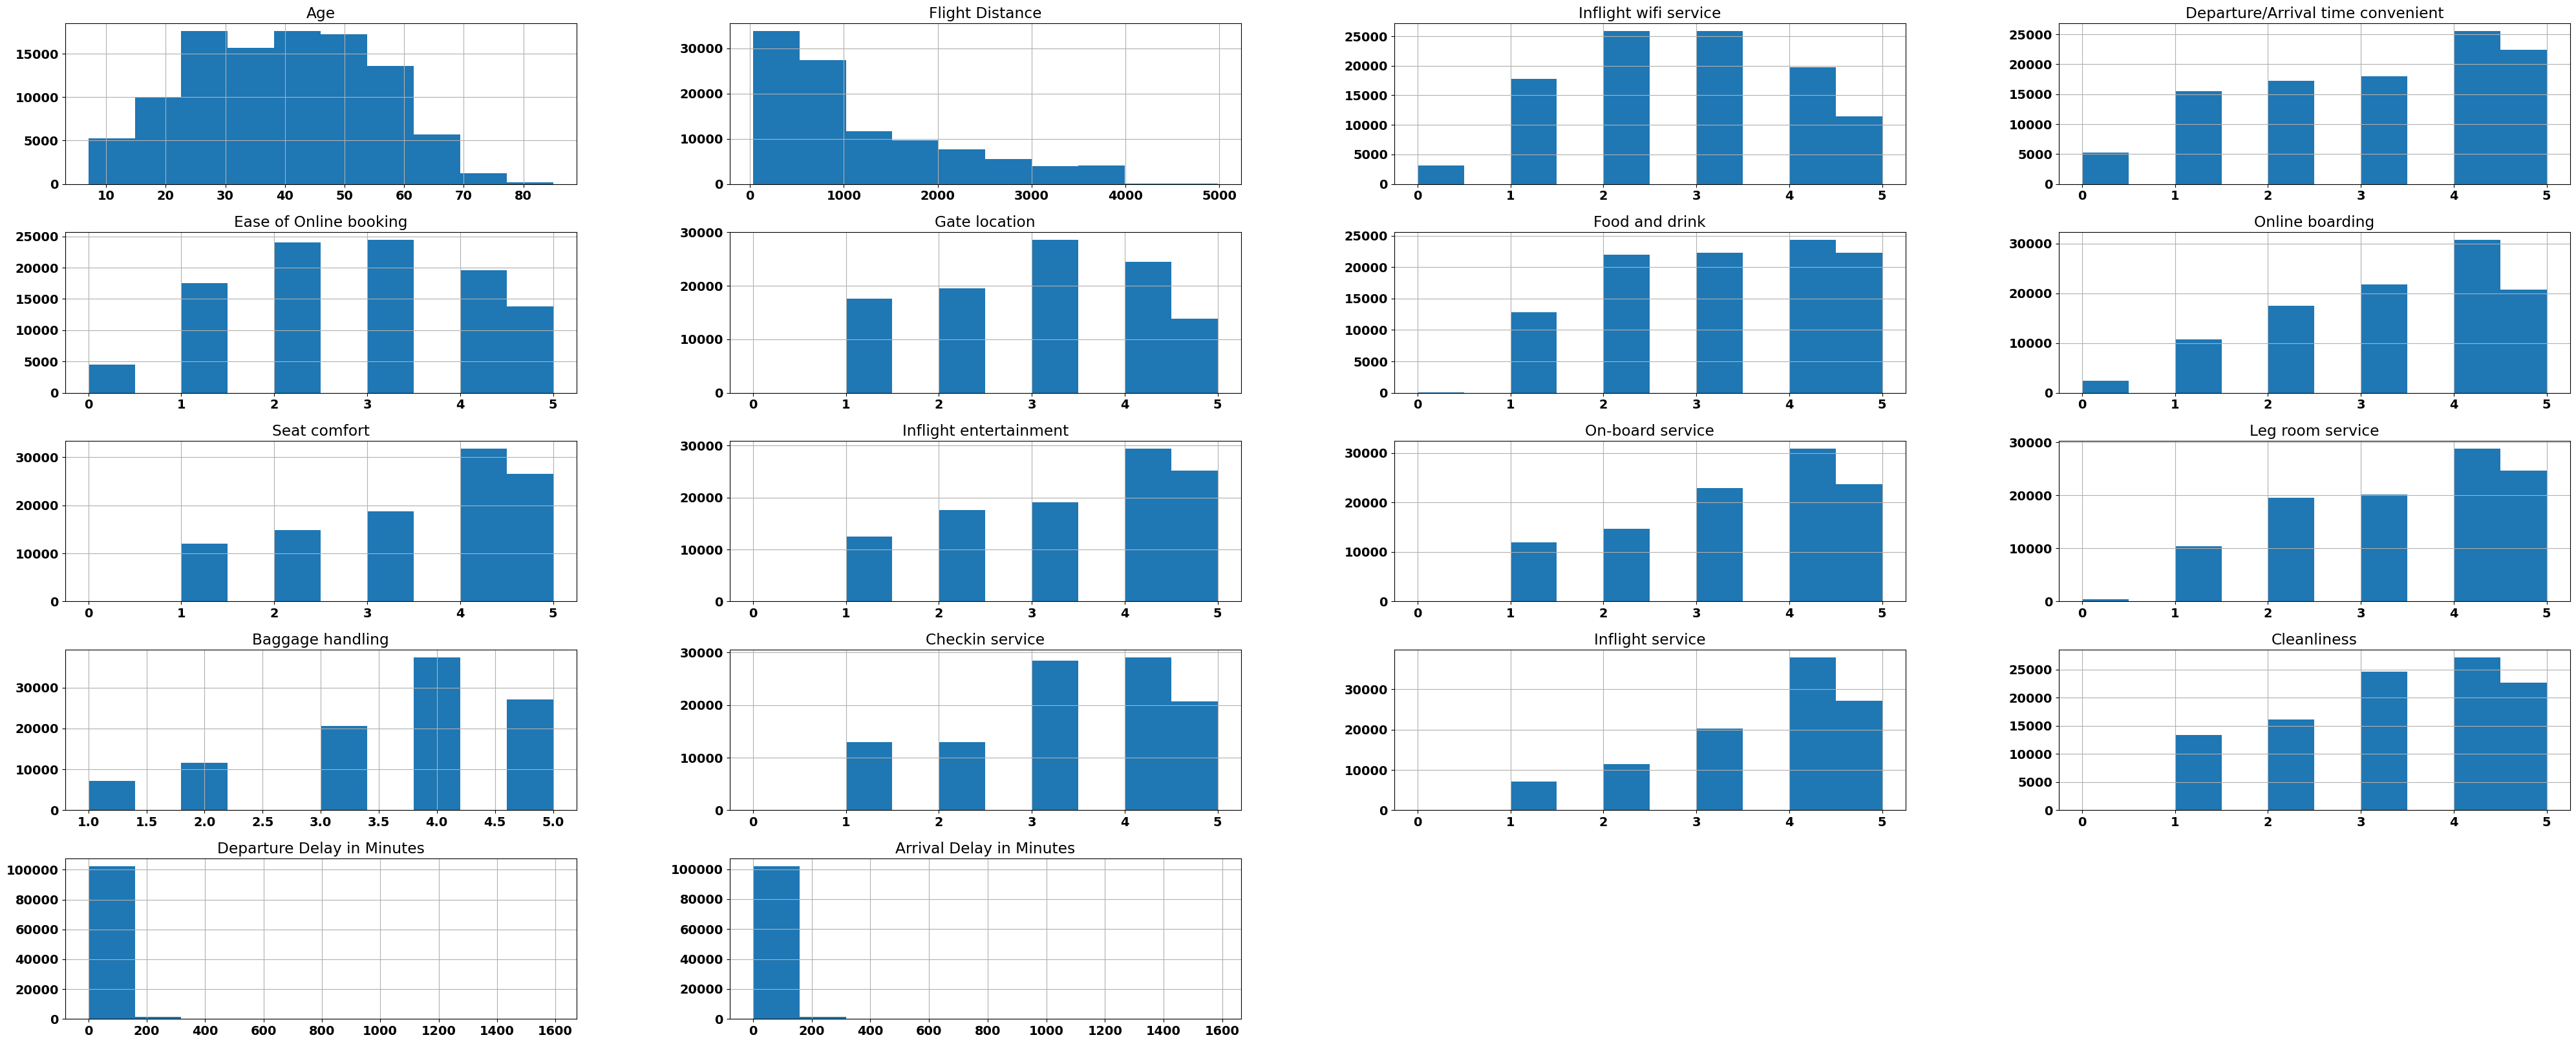

In [18]:
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data.hist(ax=ax)
plt.show()

In [19]:
# split the dataframe into its numerical and categorical components
X_num = airline_data.select_dtypes(exclude='object')
X_cat = airline_data.select_dtypes(include='object')

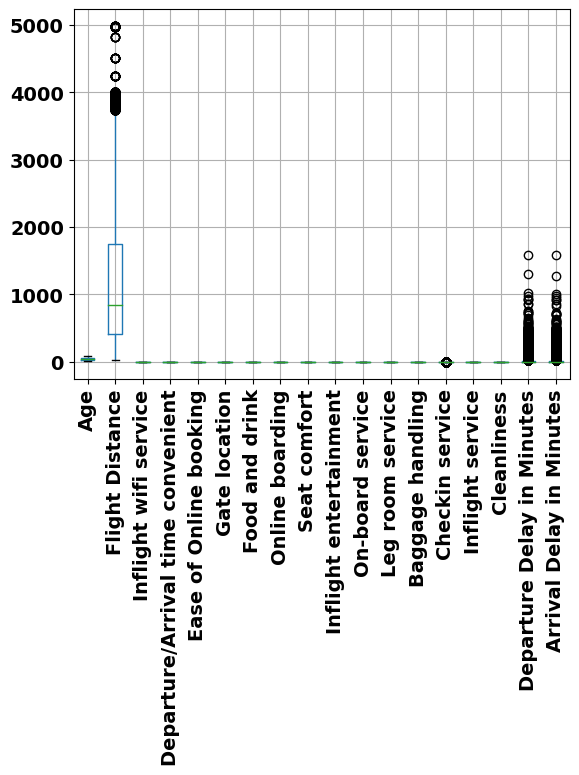

In [20]:

airline_data.boxplot(rot=90)
plt.show()

In [21]:
##
## Encode airline data

airline_data_encoded = airline_data.copy()
enc = OrdinalEncoder(categories=[['neutral or dissatisfied','satisfied']])
airline_data_encoded['satisfaction'] = enc.fit_transform(airline_data_encoded[['satisfaction']])

enc = OrdinalEncoder(categories=[['Eco','Eco Plus','Business']])
airline_data_encoded['Class'] = enc.fit_transform(airline_data_encoded[['Class']])

enc = OrdinalEncoder(categories=[['disloyal Customer','Loyal Customer']])
airline_data_encoded['Customer Type'] = enc.fit_transform(airline_data_encoded[['Customer Type']])

label_encoder = LabelEncoder()
airline_data_encoded['Gender'] = label_encoder.fit_transform(airline_data_encoded['Gender'])
enc = OrdinalEncoder(categories=[['Personal Travel','Business travel']])
airline_data_encoded['Type of Travel'] = enc.fit_transform(airline_data_encoded[['Type of Travel']])

In [22]:
airline_data_test_encoded = airline_data_test.copy()
enc = OrdinalEncoder(categories=[['neutral or dissatisfied','satisfied']])
airline_data_test_encoded['satisfaction'] = enc.fit_transform(airline_data_test_encoded[['satisfaction']])

enc = OrdinalEncoder(categories=[['Eco','Eco Plus','Business']])
airline_data_test_encoded['Class'] = enc.fit_transform(airline_data_test_encoded[['Class']])

enc = OrdinalEncoder(categories=[['disloyal Customer','Loyal Customer']])
airline_data_test_encoded['Customer Type'] = enc.fit_transform(airline_data_test_encoded[['Customer Type']])

label_encoder = LabelEncoder()
airline_data_test_encoded['Gender'] = label_encoder.fit_transform(airline_data_test_encoded['Gender'])
enc = OrdinalEncoder(categories=[['Personal Travel','Business travel']])
airline_data_test_encoded['Type of Travel'] = enc.fit_transform(airline_data_test_encoded[['Type of Travel']])

/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_40246/3729865174.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data_encoded.hist(ax=ax)


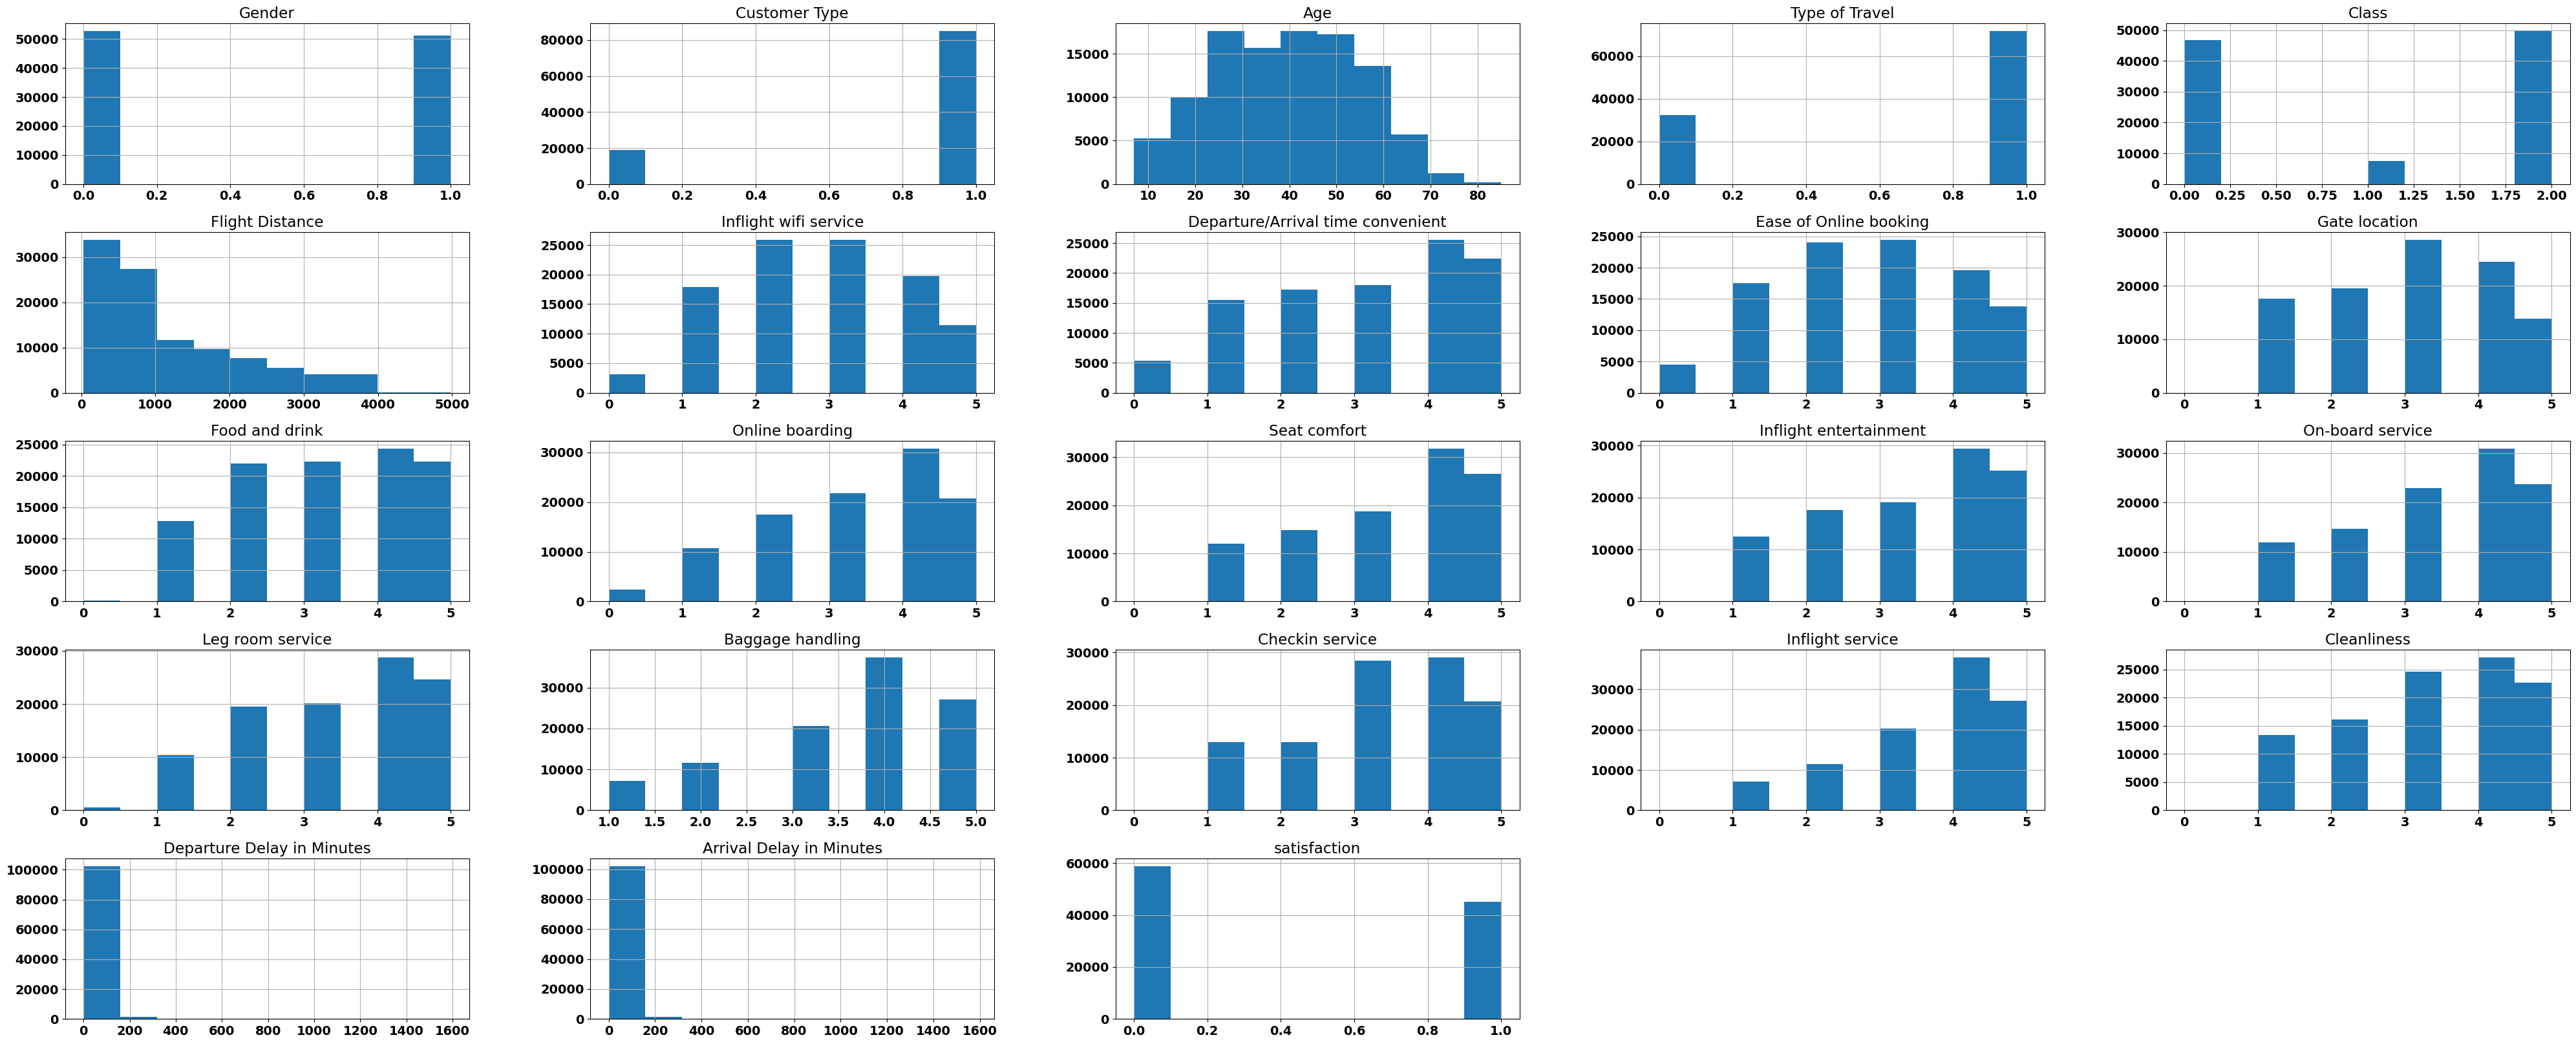

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data_encoded.hist(ax=ax)
plt.show()

/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_40246/3045698772.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data_test_encoded.hist(ax=ax)


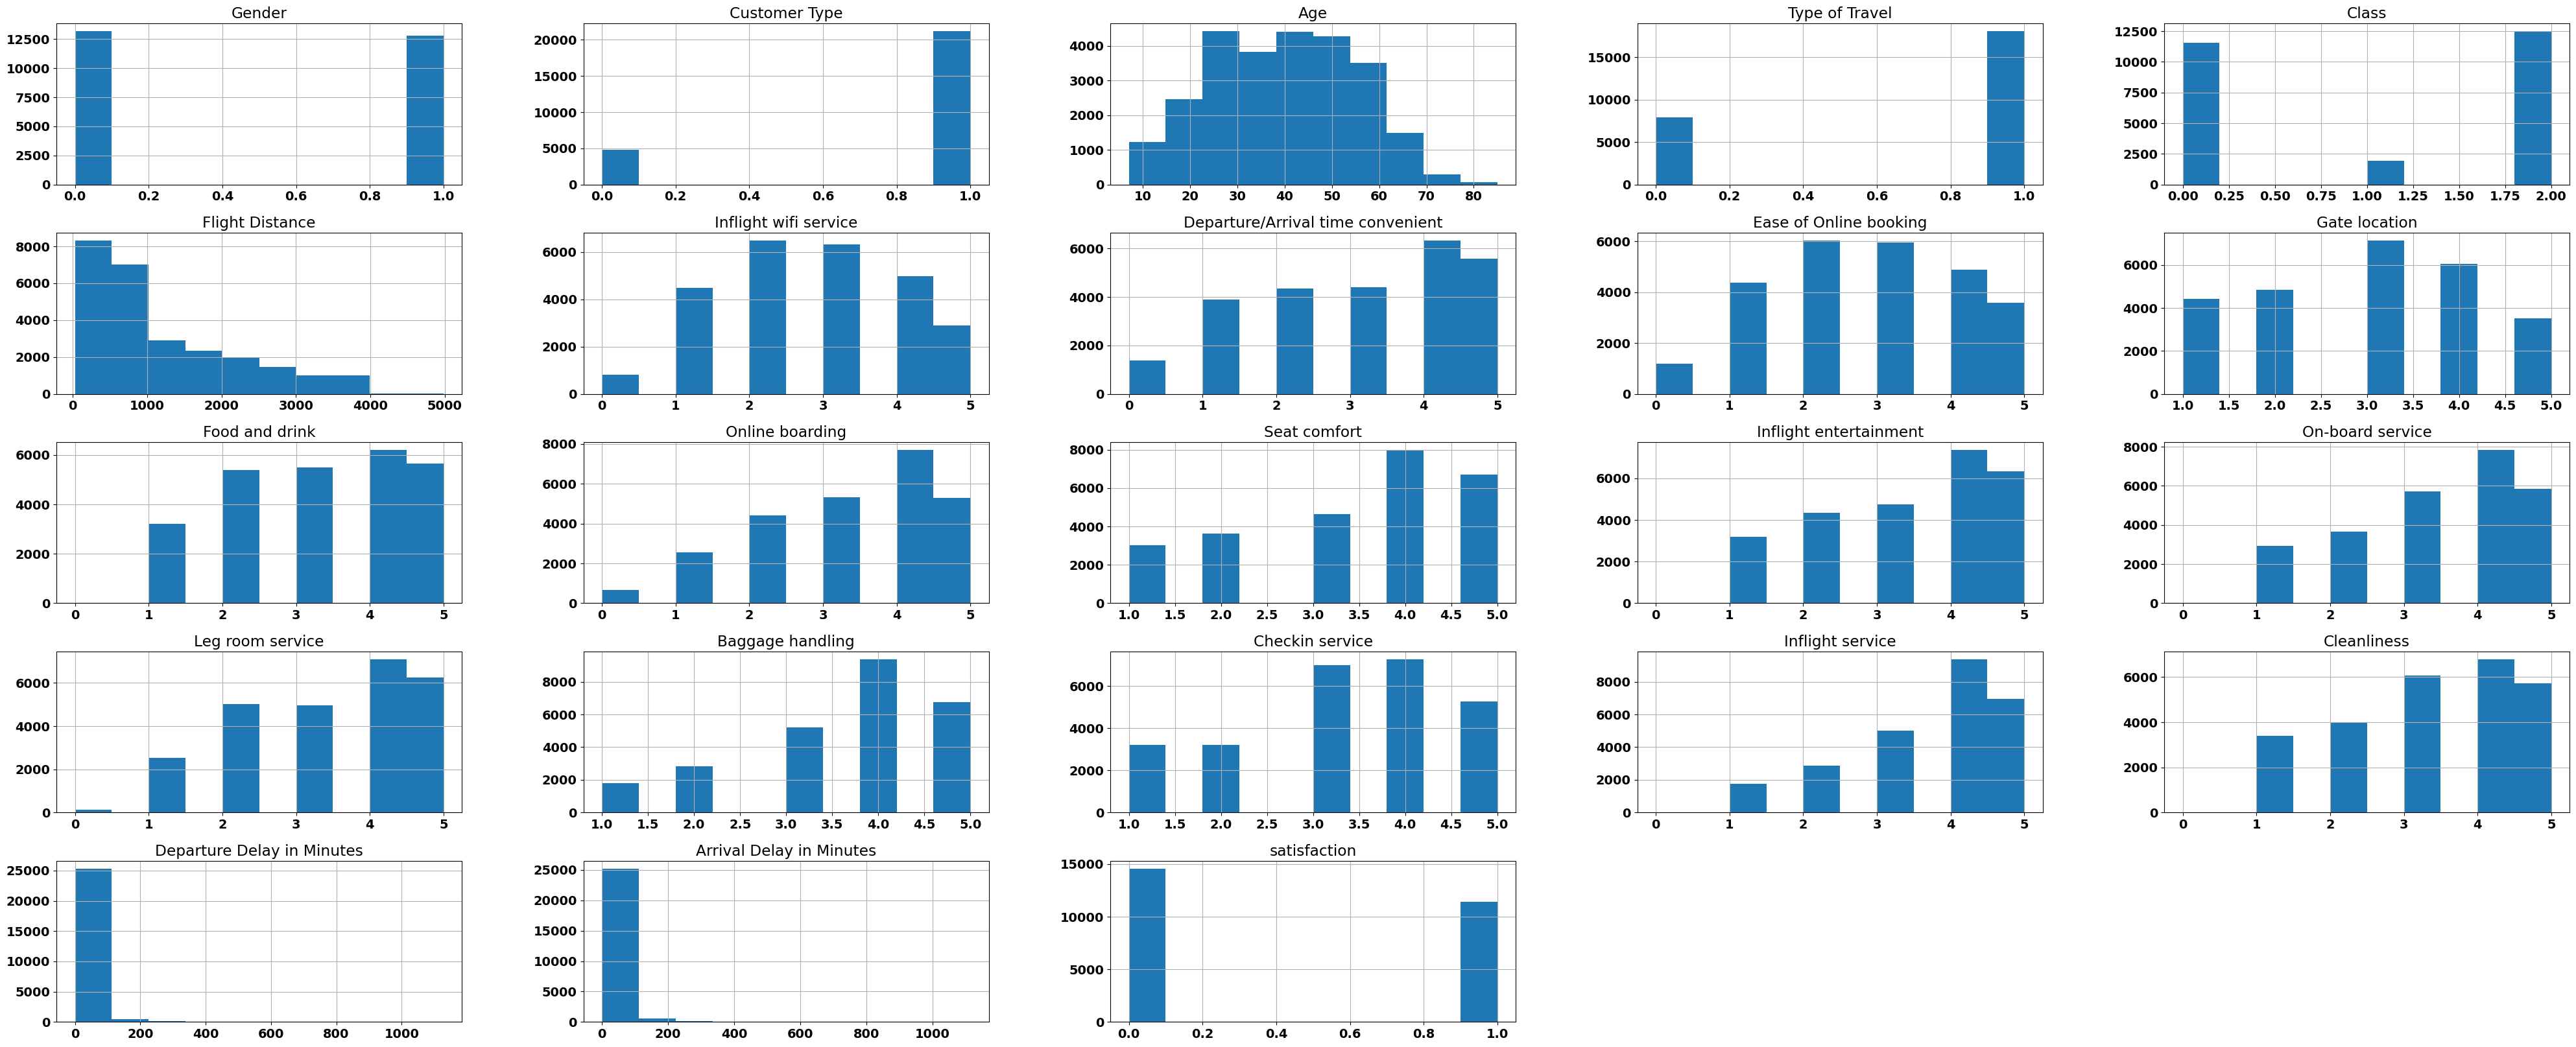

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data_test_encoded.hist(ax=ax)
plt.show()

In [25]:
airline_data_encoded.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [26]:
airline_data_encoded.isna().sum().sum()

310

In [27]:
airline_data_encoded = airline_data_encoded[~airline_data_encoded.isna().any(axis=1)]

In [28]:
airline_data_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,13,0.0,1.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0.0
1,1,0.0,25,1.0,2.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0.0
2,0,1.0,26,1.0,2.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1.0
3,0,1.0,25,1.0,2.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0.0
4,1,1.0,61,1.0,2.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0.0,23,1.0,0.0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0.0
103900,1,1.0,49,1.0,2.0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1.0
103901,1,0.0,30,1.0,2.0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0.0
103902,0,0.0,22,1.0,0.0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0.0


In [29]:
airline_data_test_encoded = airline_data_test_encoded[~airline_data_test_encoded.isna().any(axis=1)]

In [30]:
airline_data_test_encoded 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1.0,52,1.0,0.0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1.0
1,0,1.0,36,1.0,2.0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1.0
2,1,0.0,20,1.0,0.0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0.0
3,1,1.0,44,1.0,2.0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1.0
4,0,1.0,49,1.0,0.0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0.0,34,1.0,2.0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0.0
25972,1,1.0,23,1.0,2.0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1.0
25973,0,1.0,17,0.0,0.0,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0.0
25974,1,1.0,14,1.0,2.0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1.0


In [31]:
airline_data_encoded_x = airline_data_encoded[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
airline_data_encoded_train_y = airline_data_encoded[['satisfaction']]

In [32]:
# scale the data to be in the same range
#
min_max_scaler = preprocessing.MinMaxScaler()

In [33]:
airline_data_encoded[airline_data_encoded.columns] = min_max_scaler.fit_transform(airline_data_encoded)

In [34]:
airline_data_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,1.0,0.076923,0.0,0.5,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0
1,1.0,0.0,0.230769,1.0,1.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0
2,0.0,1.0,0.243590,1.0,1.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0
3,0.0,1.0,0.230769,1.0,1.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0
4,1.0,1.0,0.692308,1.0,1.0,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,0.0,0.205128,1.0,0.0,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000,0.0
103900,1.0,1.0,0.538462,1.0,1.0,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000,1.0
103901,1.0,0.0,0.294872,1.0,1.0,0.396607,0.2,0.2,0.2,0.6,...,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838,0.0
103902,0.0,0.0,0.192308,1.0,0.0,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000,0.0


In [35]:
airline_data_test_encoded[airline_data_test_encoded.columns] = min_max_scaler.fit_transform(airline_data_test_encoded)

In [36]:
airline_data_test_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,1.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1.0,0.0,0.346154,1.0,1.0,0.099960,0.6,0.6,0.6,0.00,...,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000,0.0
25972,1.0,1.0,0.205128,1.0,1.0,0.124192,0.8,0.8,0.8,0.75,...,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000,1.0
25973,0.0,1.0,0.128205,0.0,0.0,0.160945,0.4,1.0,0.2,1.00,...,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000,0.0
25974,1.0,1.0,0.089744,1.0,1.0,0.221325,0.6,0.6,0.6,0.50,...,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000,1.0


/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_40246/3729865174.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data_encoded.hist(ax=ax)


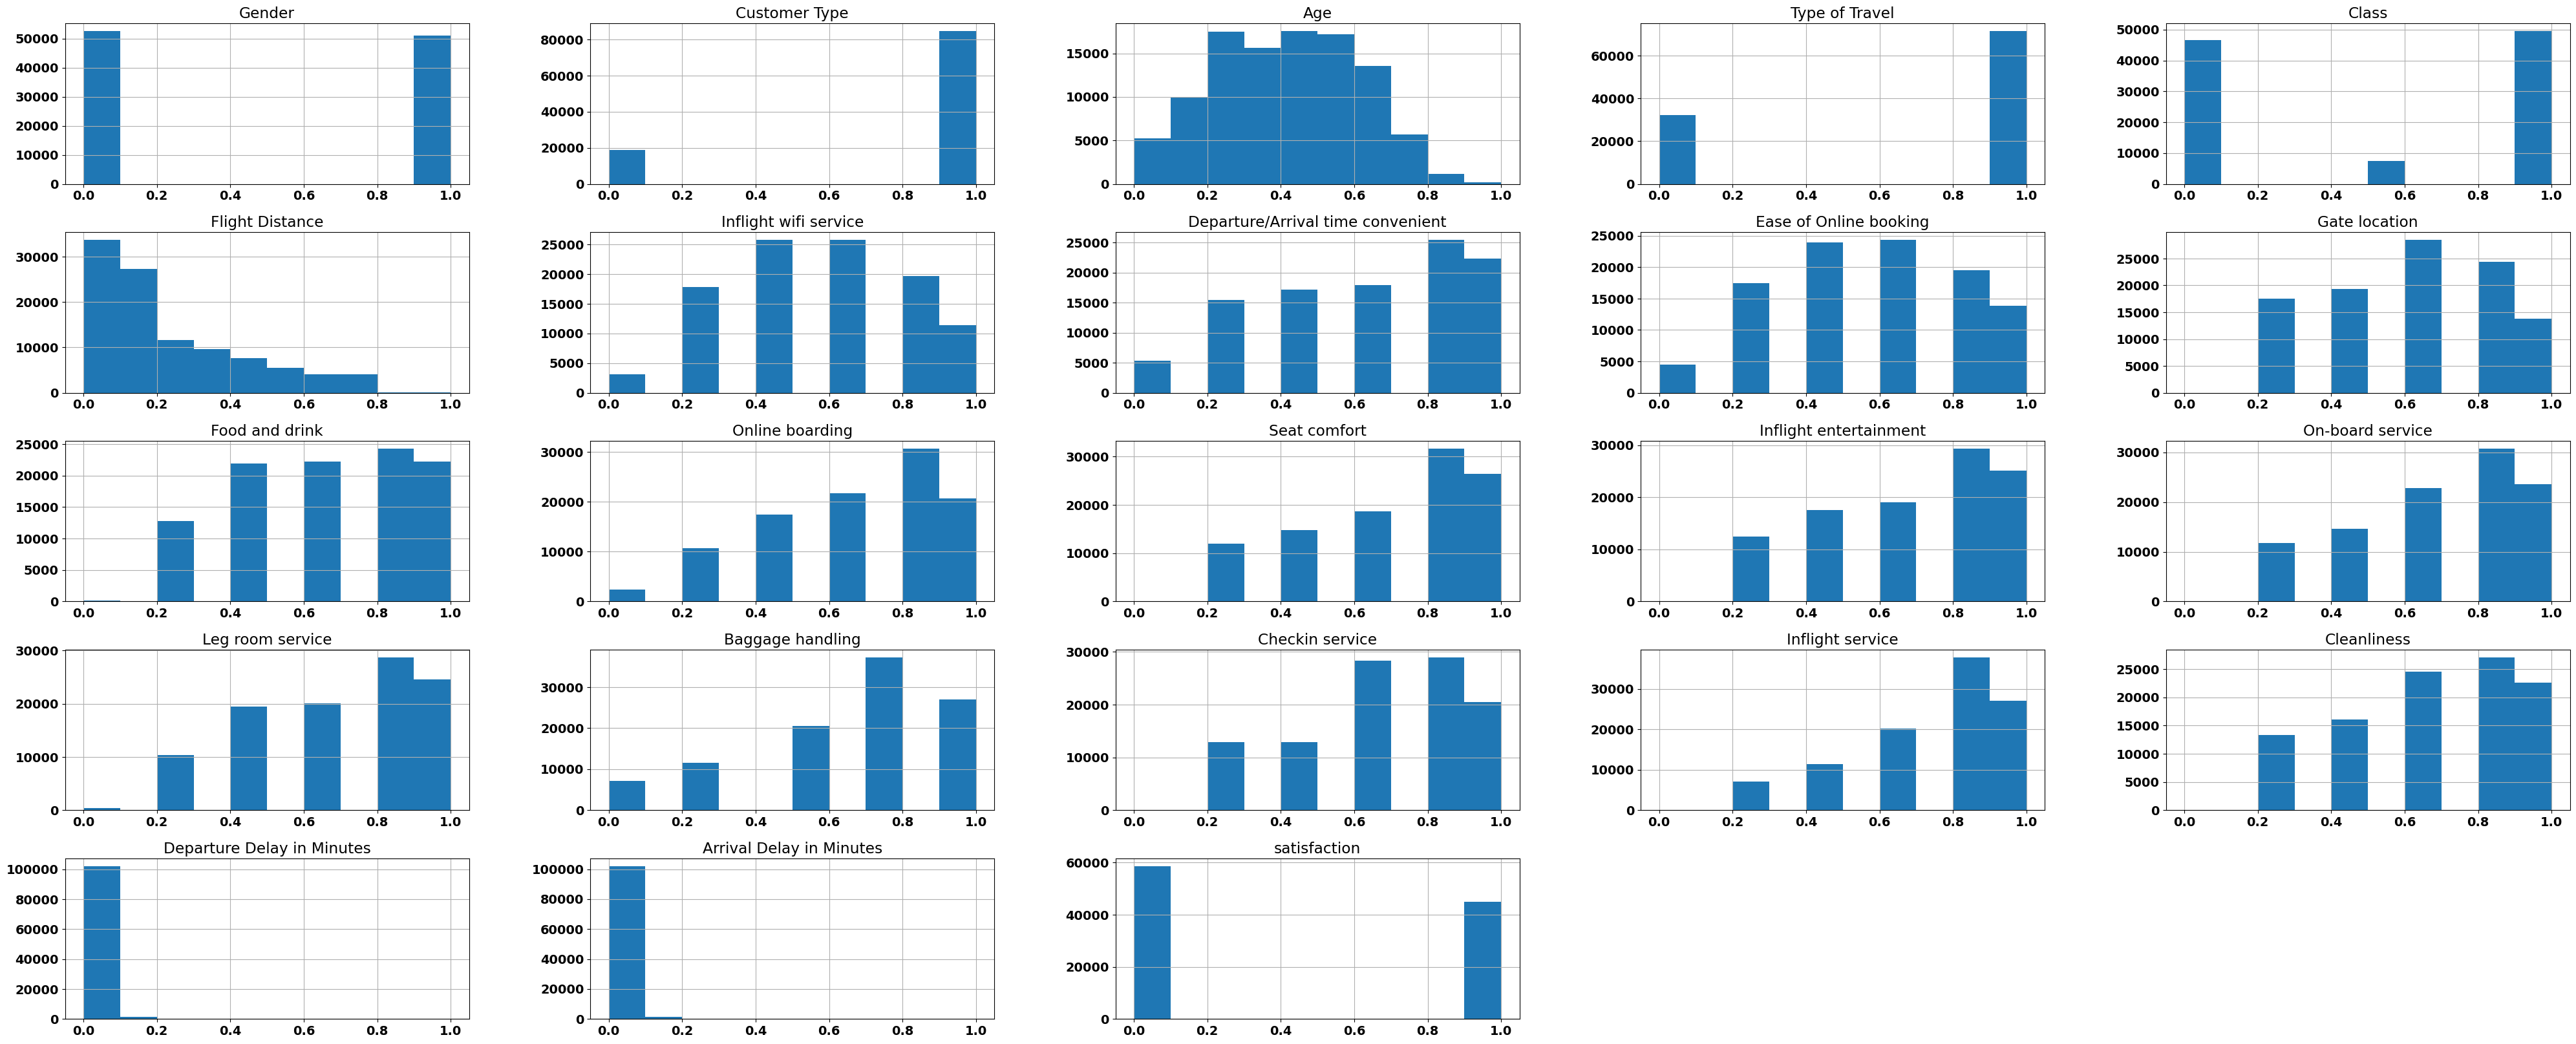

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data_encoded.hist(ax=ax)
plt.show()

<AxesSubplot: >

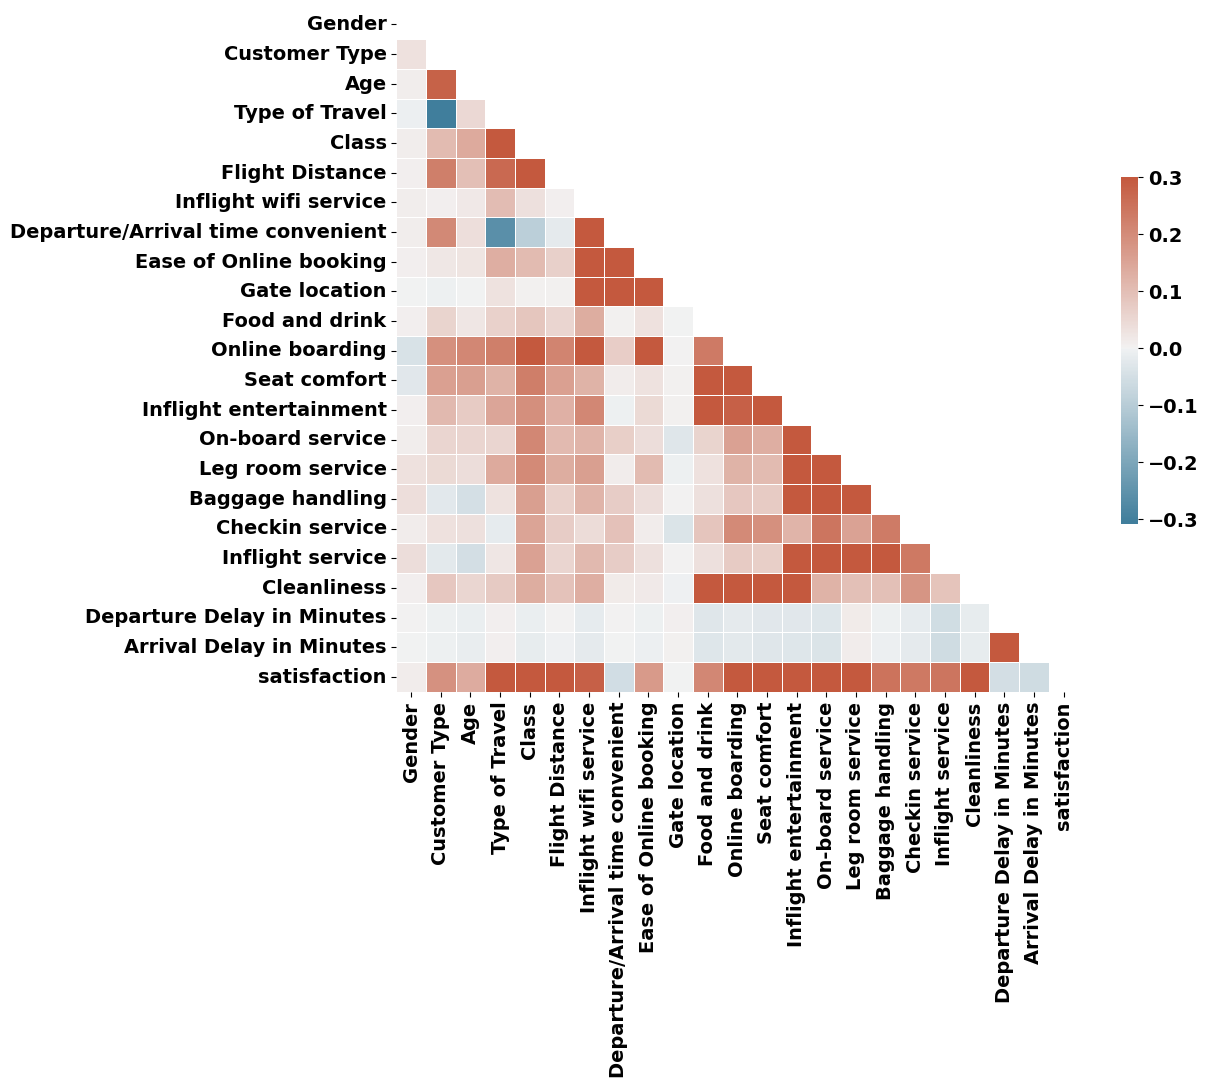

In [38]:
# Compute the correlation matrix
corr = airline_data_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

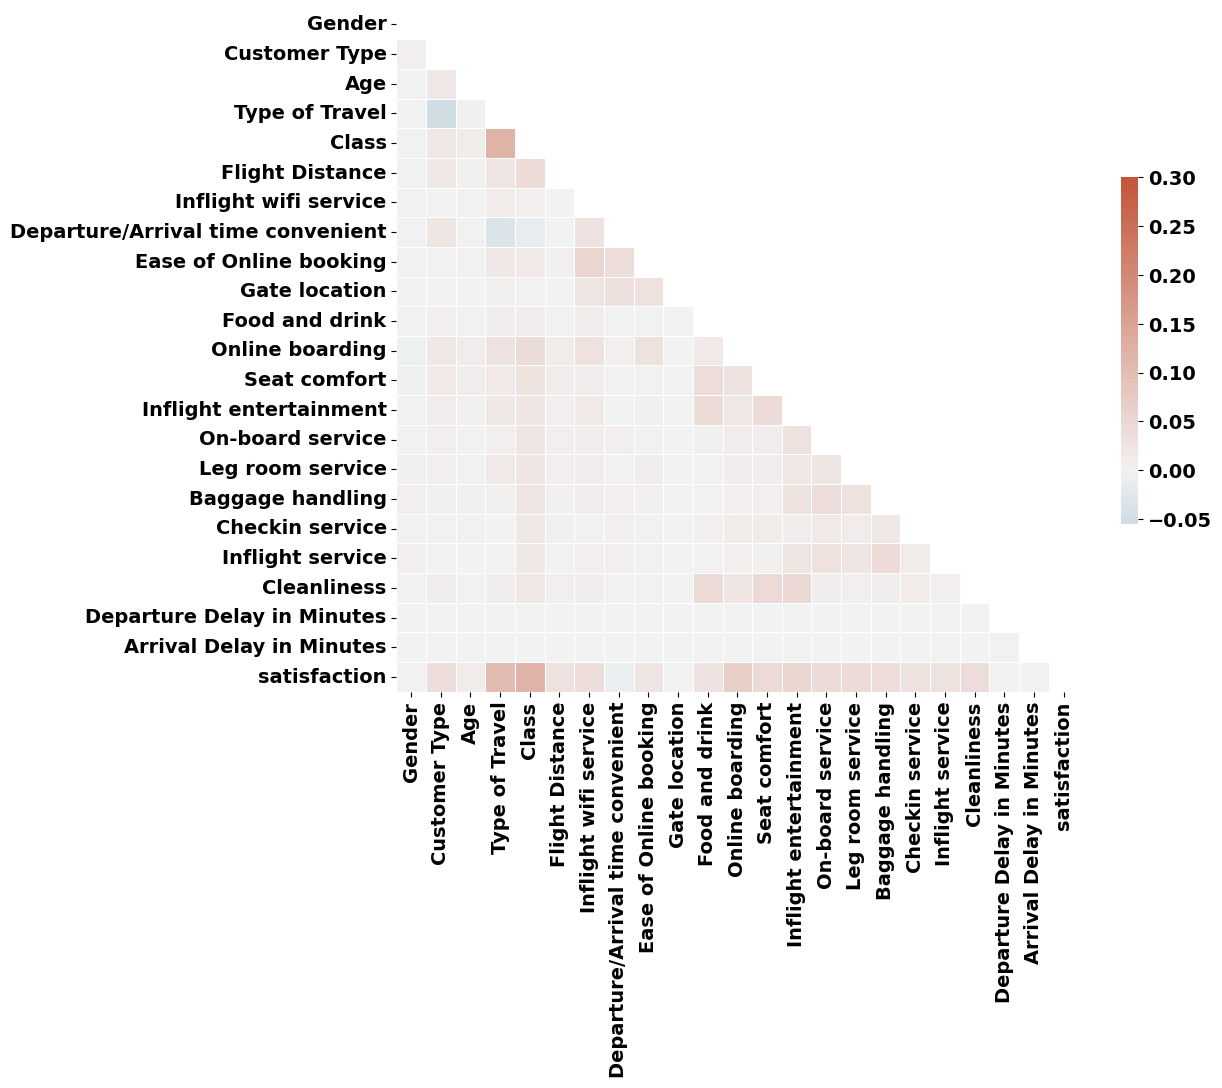

In [39]:
# Compute the correlation matrix
cov = airline_data_encoded.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
# Percentage of different classes of service that are satisfied
airline_data[(airline_data['satisfaction'] == 'satisfied')&(airline_data['Customer Type'] == 'Loyal Customer')]['Class'].value_counts()/airline_data['Class'].value_counts()*100

Business    63.567905
Eco         15.347096
Eco Plus    23.859087
Name: Class, dtype: float64

In [41]:
airline_data[(airline_data['satisfaction'] != 'satisfied')&(airline_data['Customer Type'] == 'Loyal Customer')]['Class'].value_counts()/airline_data['Class'].value_counts()*100

Business    21.620860
Eco         61.313509
Eco Plus    66.599947
Name: Class, dtype: float64

In [42]:
airline_data[(airline_data['satisfaction'] == 'satisfied')]['Class'].value_counts()/airline_data['Class'].value_counts()*100

Business    69.425148
Eco         18.613755
Eco Plus    24.606352
Name: Class, dtype: float64

In [43]:
airline_data[(airline_data['satisfaction'] == 'satisfied') & (airline_data['Type of Travel'] == 'Business travel')]['Class'].value_counts()/airline_data['Class'].value_counts()*100

Business    68.893587
Eco         12.835597
Eco Plus    20.416333
Name: Class, dtype: float64

In [44]:
airline_data['Class'].value_counts()/airline_data['Class'].count()*100

Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64

In [45]:
airline_data['Type of Travel'].value_counts()/airline_data['Type of Travel'].count()*100

Business travel    68.962696
Personal Travel    31.037304
Name: Type of Travel, dtype: float64

In [46]:
## If forecasting diabetes, is the data imbalanced
bus_eco_eco_plus = airline_data[(airline_data['Type of Travel']== 'Business travel') & (airline_data['Class']!='Business')]
bus_eco_eco_plus['satisfaction'].value_counts()/bus_eco_eco_plus.value_counts().sum()*100

neutral or dissatisfied    69.004609
satisfied                  31.269466
Name: satisfaction, dtype: float64

In [47]:
### Write data for airline training and test

In [48]:
airline_data_encoded.to_csv('airline_data_train.csv')

In [49]:
bus_eco_eco_plus = airline_data_encoded[(airline_data_encoded['Type of Travel']== 1) & (airline_data_encoded['Class']!=2)]
bus_eco_eco_plus['satisfaction'].value_counts()/bus_eco_eco_plus.value_counts().sum()*100

1.0    58.257888
0.0    41.742112
Name: satisfaction, dtype: float64

In [50]:
bus_eco_eco_plus.to_csv('airline_data_train_business.csv')

In [51]:
bus_eco_eco_plus_test = airline_data_test_encoded[(airline_data_test_encoded['Type of Travel']== 1) & (airline_data_test_encoded['Class']!=2)]
bus_eco_eco_plus_test['satisfaction'].value_counts()/bus_eco_eco_plus_test.value_counts().sum()*100

1.0    58.804227
0.0    41.195773
Name: satisfaction, dtype: float64

In [52]:
airline_data_test_encoded.to_csv('airline_data_test.csv')

In [53]:
bus_eco_eco_plus_test.to_csv('airline_data_test_business.csv')

### Now Diabetes Dataset
Taken from Kaggle link (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [54]:

diabetes_data =  pd.read_csv(diabetes_dataset_file)

In [55]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [56]:
diabetes_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [57]:
diabetes_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_40246/377347112.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = diabetes_data.hist(ax=ax)


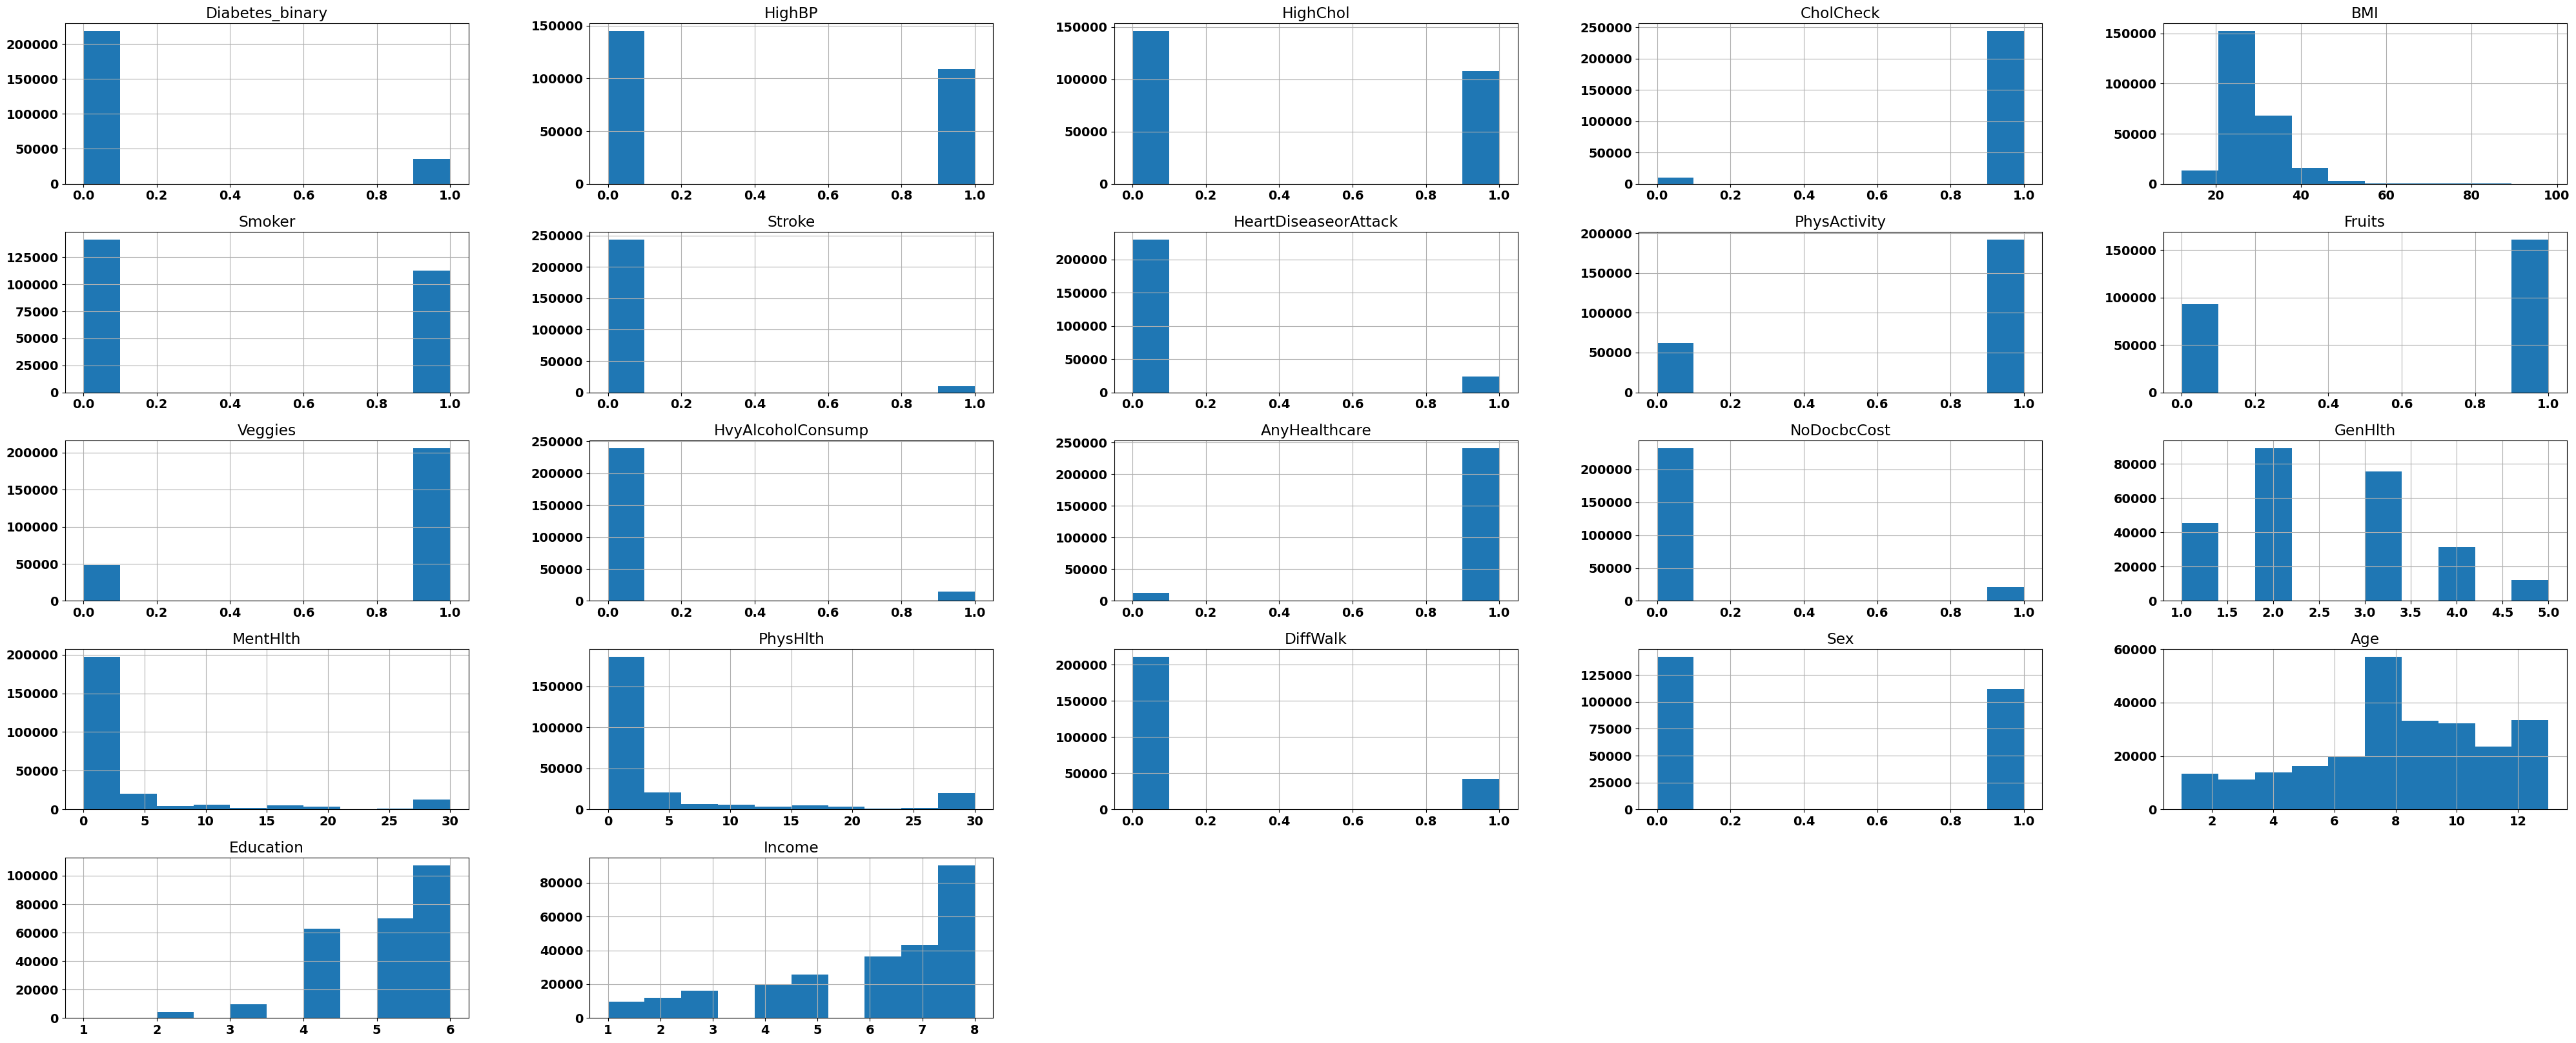

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = diabetes_data.hist(ax=ax)
plt.show()

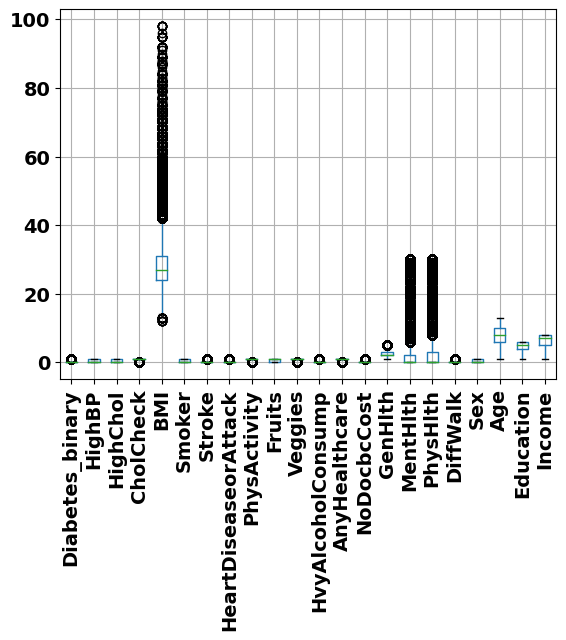

In [59]:
diabetes_data.boxplot(rot=90)
plt.show()

In [60]:
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values
# cov_mat =np.cov(X_std.T)

## Check for imbalanced dataset

In [61]:
## If forecasting diabetes, is the data imbalanced
diabetes_data['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

## Dataset is imbalannced so we will need to balance it at some point to provide a good sample

In [62]:
diabetes_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [63]:
diabetes_data = diabetes_data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
                               'Income','Diabetes_binary']]

<AxesSubplot: >

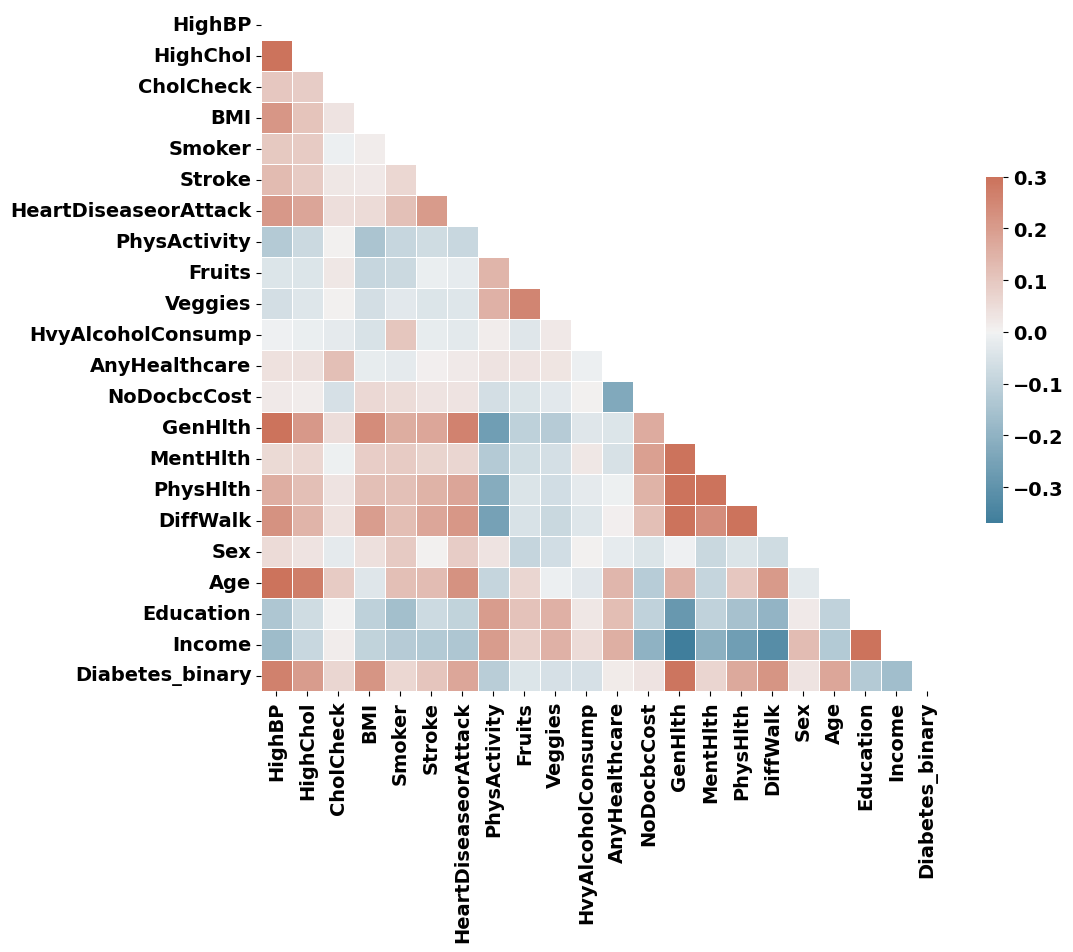

In [64]:
# Compute the correlation matrix
corr = diabetes_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

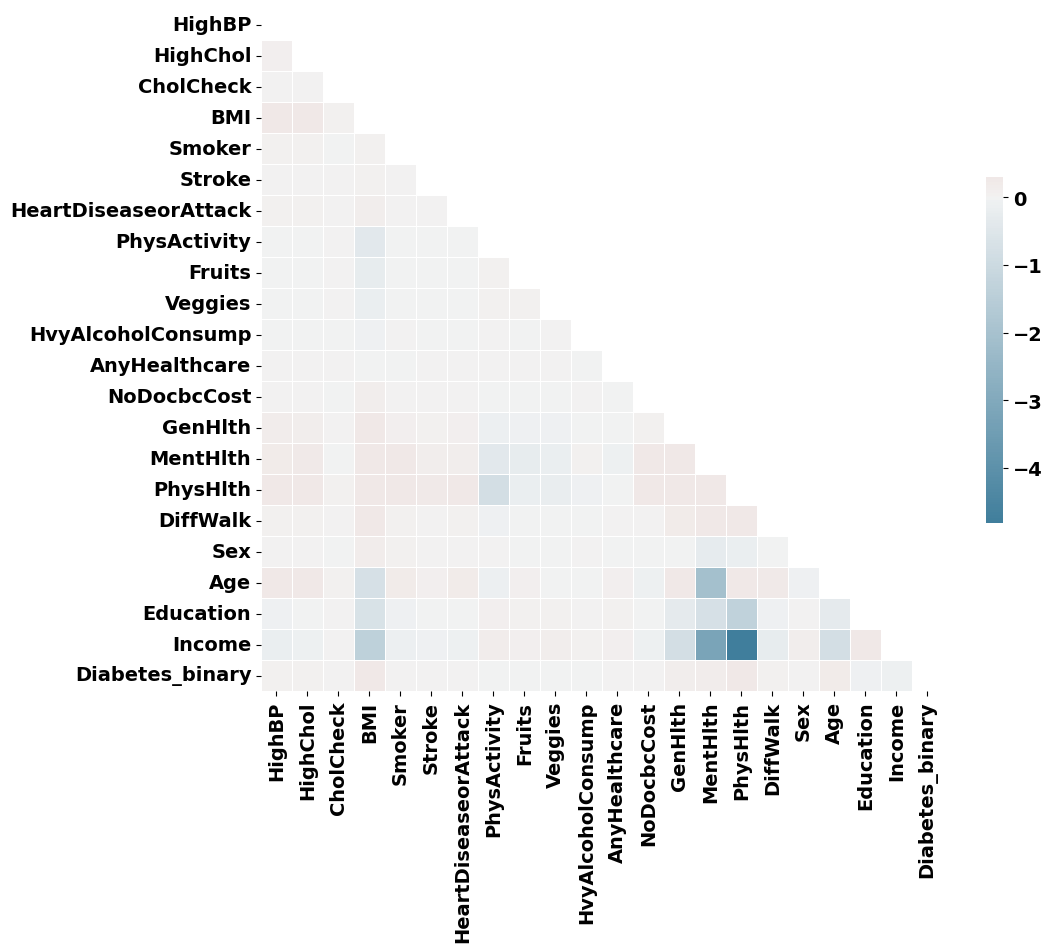

In [65]:
# Compute the correlation matrix
cov = diabetes_data.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Balance the dataset 

In [66]:
## Split into training and test/holdout

In [67]:

diabetes_train, diabetes_test_holdout = train_test_split(diabetes_data, test_size=0.2)

In [68]:
## Split into training and validation

In [69]:
# diabetes_train, diabetes_validation = train_test_split(diabetes_train, test_size=0.2)

In [70]:
# diabetes_x_train = diabetes_train[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker','Stroke',\
#                     'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', \
#                     'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', \
#                     'Sex', 'Age', 'Education','Income']]
# # X = diabetes_train.loc[:, diabetes_train.columns!='Diabetes_binary']

# diabetes_y_train = diabetes_train[['Diabetes_binary']]

In [71]:
min_max_scaler = preprocessing.MinMaxScaler()
diabetes_train[diabetes_train.columns] = min_max_scaler.fit_transform(diabetes_train[diabetes_train.columns])

In [72]:
diabetes_train.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
41728,1.0,0.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,1.0,0.750000,1.0,0.857143,0.0
141228,0.0,1.0,1.0,0.244186,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.50,0.000000,0.000000,0.0,1.0,0.583333,0.8,0.857143,0.0
93687,0.0,0.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.00,0.000000,0.000000,0.0,0.0,0.416667,0.8,0.714286,0.0
169207,0.0,0.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,0.0,1.0,0.666667,0.6,0.857143,1.0
153851,1.0,0.0,1.0,0.174419,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.500000,0.166667,1.0,1.0,0.500000,0.6,0.857143,0.0
94838,1.0,1.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,1.0,0.500000,0.8,1.000000,0.0
22037,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.00,0.100000,0.000000,0.0,0.0,0.916667,1.0,1.000000,0.0
51549,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.033333,0.033333,0.0,1.0,0.833333,1.0,1.000000,0.0
63883,1.0,1.0,1.0,0.116279,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,1.0,0.583333,0.6,0.714286,0.0
1878,1.0,0.0,1.0,0.255814,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,1.0,0.833333,1.0,0.857143,0.0


### Resample the data

In [73]:
rus = RandomUnderSampler(random_state=42)
diabetes_train, y_resampled = rus.fit_resample(diabetes_train,diabetes_train[['Diabetes_binary']])

In [74]:
diabetes_train.value_counts()

HighBP  HighChol  CholCheck  BMI       Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age       Education  Income    Diabetes_binary
0.0     0.0       1.0        0.127907  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.500000  1.0        1.000000  0.0                12
                             0.139535  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       1.0  0.416667  1.0        1.000000  0.0                10
                             0.104651  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.416667  1.0        1.000000  0.0                1

In [75]:
diabetes_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [76]:
y_resampled.value_counts()

Diabetes_binary
0.0                28286
1.0                28286
dtype: int64

In [77]:
diabetes_train.to_csv('diabetes_train_data.csv')

In [78]:
min_max_scaler = preprocessing.MinMaxScaler()
diabetes_test_holdout[diabetes_test_holdout.columns] = min_max_scaler.fit_transform(diabetes_test_holdout[diabetes_test_holdout.columns])

In [79]:
diabetes_test_holdout.to_csv('diabetes_test_data.csv')